In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score, precision_score, recall_score

In [2]:
dp = pd.read_csv("heart.csv")

In [3]:
dp.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
Sex = list(dp["Sex"].unique())
ChestPainType = list(dp["ChestPainType"].unique())
RestingECG = list(dp["RestingECG"].unique())
ExerciseAngina = list(dp["ExerciseAngina"].unique())
ST_Slope = list(dp["ST_Slope"].unique())
print("Sex labels:", Sex)
print("ChestPainType labels:", ChestPainType)
print("RestingECG labels:", RestingECG)
print("ExerciseAngina labels:", ExerciseAngina)
print("ST_Slope:", ST_Slope)

Sex labels: ['M', 'F']
ChestPainType labels: ['ATA', 'NAP', 'ASY', 'TA']
RestingECG labels: ['Normal', 'ST', 'LVH']
ExerciseAngina labels: ['N', 'Y']
ST_Slope: ['Up', 'Flat', 'Down']


In [5]:
dp_OHE = pd.get_dummies(
    data=dp,
    columns=["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"],
    prefix=["sex", "c.p","ECG", "EA", "ST"])

In [6]:
del dp_OHE["sex_F"]
del dp_OHE["EA_Y"]

In [7]:
dp_OHE

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,sex_M,c.p_ASY,c.p_ATA,c.p_NAP,c.p_TA,ECG_LVH,ECG_Normal,ECG_ST,EA_N,ST_Down,ST_Flat,ST_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,0,1,0,1,0,1,0,1,0
914,68,144,193,1,141,3.4,1,1,1,0,0,0,0,1,0,1,0,1,0
915,57,130,131,0,115,1.2,1,1,1,0,0,0,0,1,0,0,0,1,0
916,57,130,236,0,174,0.0,1,0,0,1,0,0,1,0,0,1,0,1,0


In [8]:
y = dp_OHE.HeartDisease.values
x_data = dp_OHE.drop(["HeartDisease"],axis=1)

In [9]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [10]:
x.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,sex_M,c.p_ASY,c.p_ATA,c.p_NAP,c.p_TA,ECG_LVH,ECG_Normal,ECG_ST,EA_N,ST_Down,ST_Flat,ST_Up
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.183673,0.65,0.469320,0.0,0.267606,0.295455,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.408163,0.69,0.354892,0.0,0.338028,0.465909,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.530612,0.75,0.323383,0.0,0.436620,0.295455,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

In [12]:
x_train[4]

Age            0.530612
RestingBP      0.750000
Cholesterol    0.323383
FastingBS      0.000000
MaxHR          0.436620
Oldpeak        0.295455
sex_M          1.000000
c.p_ASY        0.000000
c.p_ATA        0.000000
c.p_NAP        1.000000
c.p_TA         0.000000
ECG_LVH        0.000000
ECG_Normal     1.000000
ECG_ST         0.000000
EA_N           1.000000
ST_Down        0.000000
ST_Flat        0.000000
ST_Up          1.000000
Name: 4, dtype: float64

Logistic Regression

In [13]:
# initialize parameters and define sigmoid function

def initialize_weights_and_bias(dimension):
    
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b

def sigmoid(z):
    
    y_head = 1 / (1+np.exp(-z))
    
    return y_head

In [14]:
#Forward & Backward Propagation

def forward_backward_propagation(w,b,x_train,y_head):
    
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head) - (1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss)) / x_train.shape[1]
    
    #backward propogation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [15]:
#update function to update the learning parameters
    
def update(w, b, x_train, y_train, learning_rate,number_of_iteration):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iteration):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [16]:
#predict output for a given test input based on the weights and bias

def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is one means has diabete (y_head=1),
    # if z is smaller than 0.5, our prediction is zero means does not have diabete (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

In [17]:
#logistic regression function to calculate the accuracy of the result from our learning
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate , num_iterations):
    # initialize
    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)

    TP = np.sum((y_prediction_test==1) & (y_test==1)) #calculates the number of positive result predicted correctly from the learning
    TN = np.sum((y_prediction_test==0) & (y_test==0)) #calculates the number of negative result predicted correctly from the learning
    FN = np.sum((y_prediction_test==0) & (y_test==1)) #calculates the number of positive result predicted wrongly from the learning
    FP = np.sum((y_prediction_test==1) & (y_test==0)) #calculates the number of negative result predicted wrongly from the learning
    matrix = np.array([[TP,FN],[FP,TN]])
    print(matrix)
    
    Precision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    F1_Score = (2*Precision*Recall)/(Precision+Recall)
    Accuracy = (TP+TN)/(TP+FP+TN+FN)

    # Print the confusion matrix using Matplotlib
#
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(matrix.shape[0]):
         for j in range(matrix.shape[1]):
            ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='xx-large')
 
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    #n_zeros = np.count_nonzero(y_prediction_test==0 & y_test==0)
    print("F1 score:{0}".format(F1_Score))
    #print(F1_Score)
    print("Accuracy:{0}".format(Accuracy))   

k-fold cross validation (know the idea behind but unable to implement)

In [18]:
#import numpy as np
#from sklearn.model_selection import KFold
#kf = KFold(n_splits=5)
#kf.get_n_splits(x_train)
#KFold(n_splits=5, random_state=None, shuffle=False)
#for train1_index, test1_index in kf.split(x_train):
 #   x_train1, x_test1 = x_train[train1_index], x_train[test1_index]
  #  y_train1, y_test1 = y_train[train1_index], y_train[test1_index]

Result (cost variation with iterations, Confusion Matrix, F1 score, accuracy)

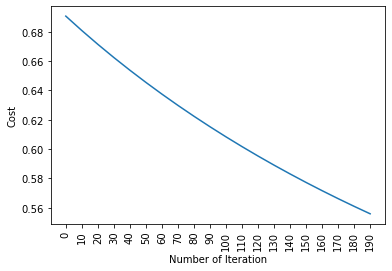

[[96 11]
 [13 64]]


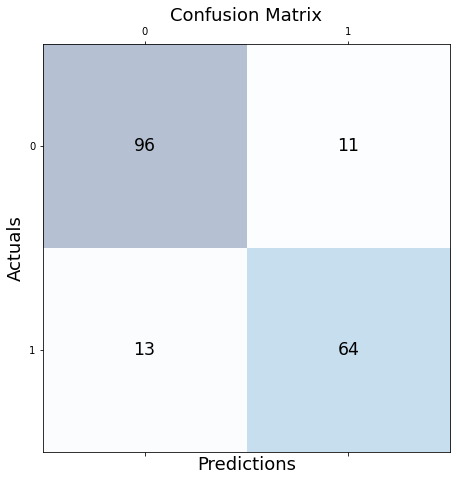

F1 score:0.8888888888888888
Accuracy:0.8695652173913043


In [19]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 200)